In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import statsmodels.api as sm


import piplite
await piplite.install('seaborn')
import seaborn as sns


In [2]:
data = load_wine()
wine_df = pd.DataFrame(data.data, columns=data.feature_names)
wine_df.insert(13, 'CLASS', data.target)
wine_df = wine_df.drop_duplicates()
wine_df.head(10)
# wine_df.describe()
# wine_df.shape

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,CLASS
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0


In [3]:
y = np.array(wine_df['CLASS'])
x = np.array(wine_df.drop('CLASS', axis=1))

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

logreg.score(X_test, y_test)

/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9814814814814815

In [4]:
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()
original_coef = pd.DataFrame({'coef:':results.params, 'p-value':results.pvalues})
print('BIC', results.bic)
print('r-squared', results.rsquared)

BIC 71.28544526063132
r-squared 0.8984366273887161


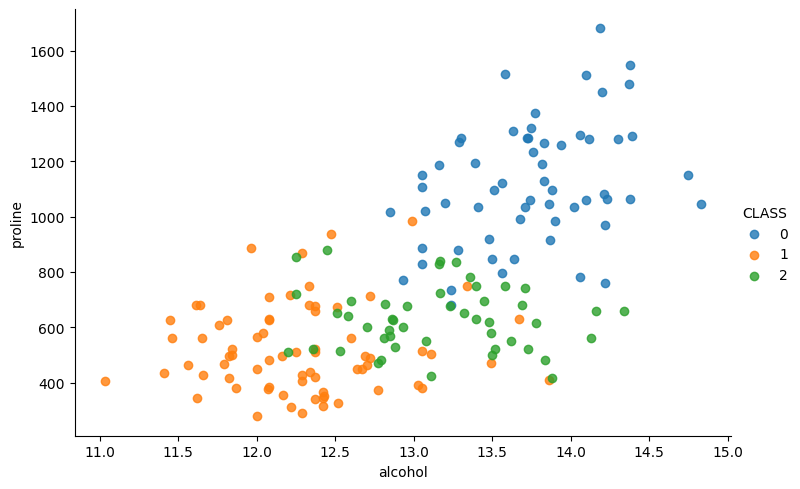

In [5]:
sns.lmplot(x='alcohol',y='proline',data=wine_df,fit_reg=False,hue='CLASS',aspect=1.5)

In [6]:
# wine_df.corr()
mask = np.zeros_like(wine_df.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

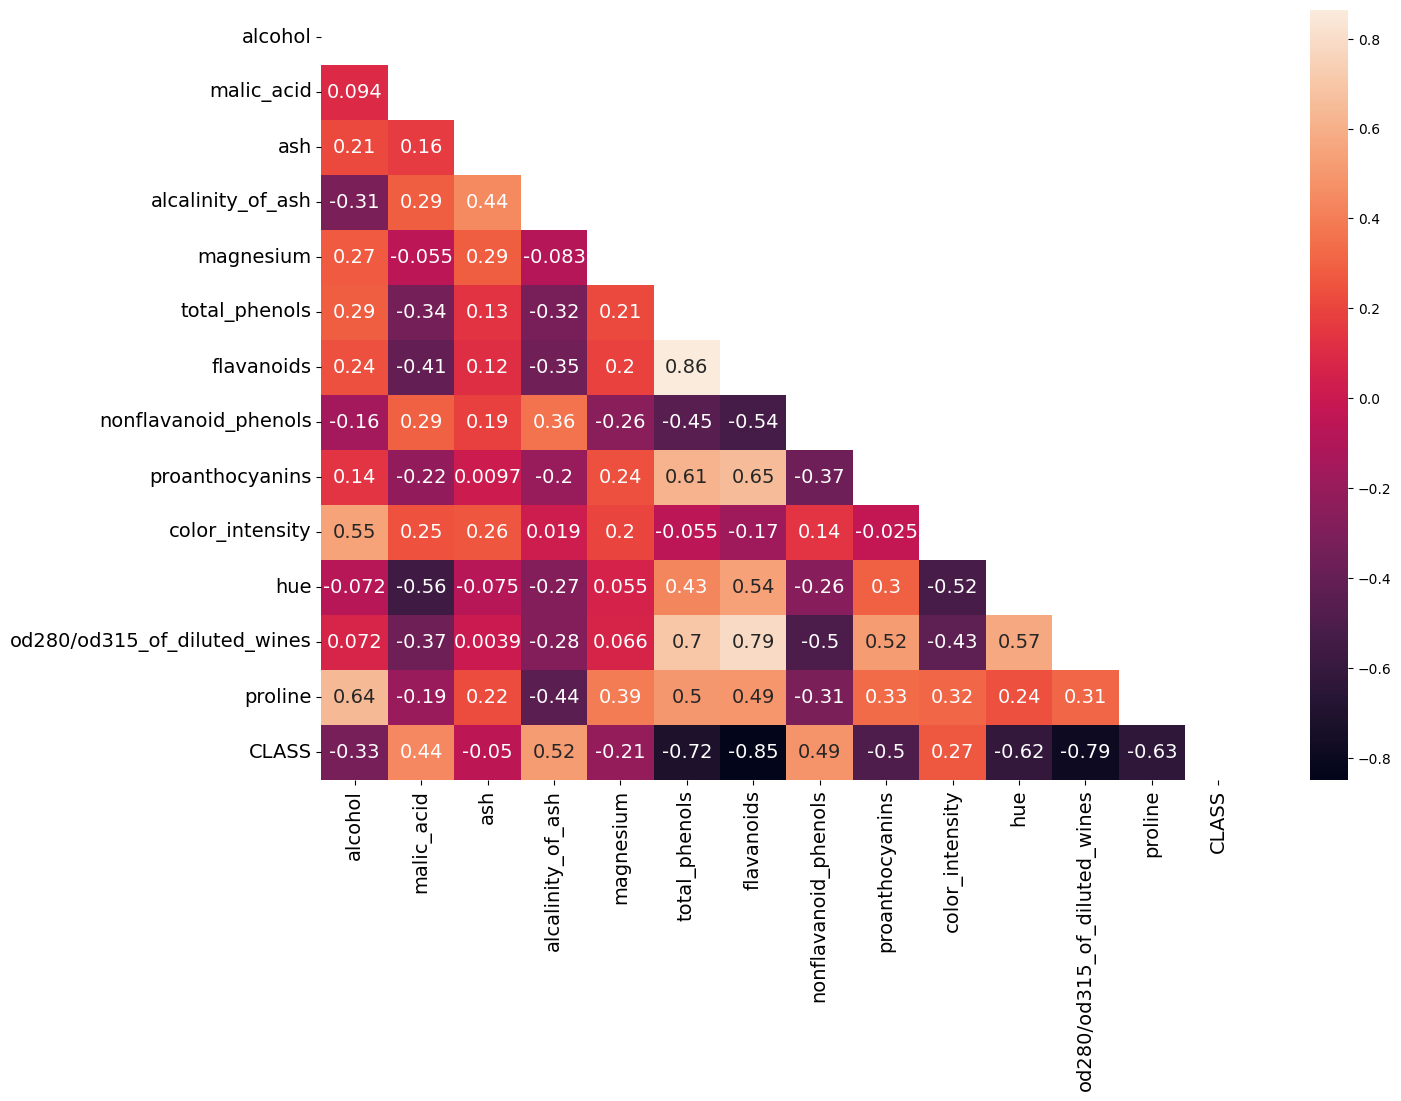

In [7]:
import seaborn as sns

plt.figure(figsize=(15,10))
sns.heatmap(wine_df.corr(), mask=mask, annot=True, annot_kws={'size': 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [8]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
clf.predict(X_test)

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2, 0, 1, 1, 2, 0, 1, 0, 0, 2])

In [9]:
clf.score(X_test,y_test)

0.9629629629629629

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, clf.predict(X_test))

0.9629629629629629

In [11]:
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,CLASS
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [12]:
# ['ash', 'magnesium', 'color_intensity']
wine_df2 = wine_df.drop(columns=['ash', 'magnesium', 'color_intensity'], axis=1)
wine_df2.columns

Index(['alcohol', 'malic_acid', 'alcalinity_of_ash', 'total_phenols',
       'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'CLASS'],
      dtype='object')

In [13]:
y = np.array(wine_df2['CLASS'])
x = np.array(wine_df2.drop('CLASS', axis=1))

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

logreg.score(X_test, y_test)

/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9629629629629629

In [14]:
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()
original_coef = pd.DataFrame({'coef:':results.params, 'p-value':results.pvalues})
print('BIC', results.bic)
print('r-squared', results.rsquared)

BIC 77.18791651290928
r-squared 0.880310216952428


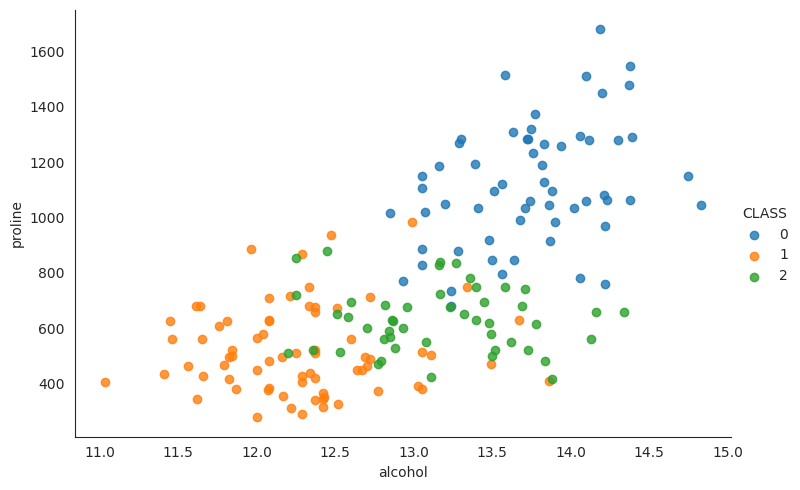

In [15]:
sns.lmplot(x='alcohol',y='proline',data=wine_df2, fit_reg=False, hue='CLASS', aspect=1.5)